In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_frame = pd.read_csv("/content/Iris (2).csv")
data_frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data_frame.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data_frame.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data_frame.duplicated().sum()

0

In [8]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
x = data_frame[features].values #Input
y = data_frame["Species"].values #Output

<Axes: >

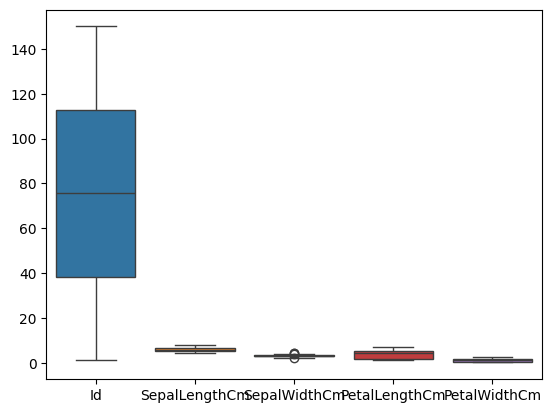

In [9]:
sns.boxplot(data=data_frame)

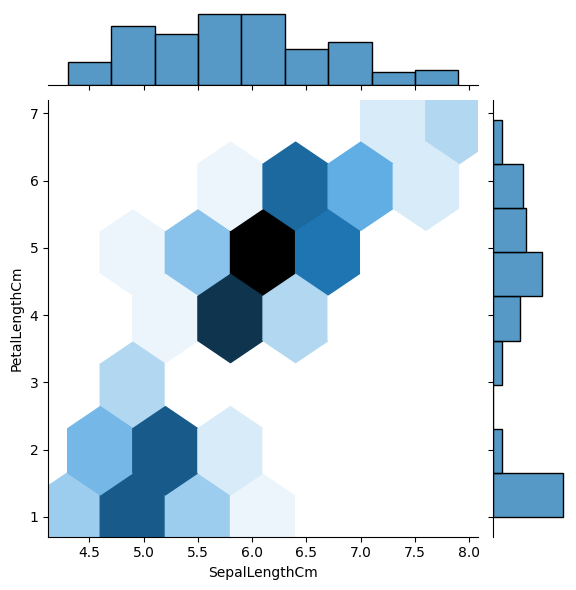

In [10]:
sns.jointplot(x=data_frame['SepalLengthCm'], y=data_frame['PetalLengthCm'], data=data_frame, kind='hex')

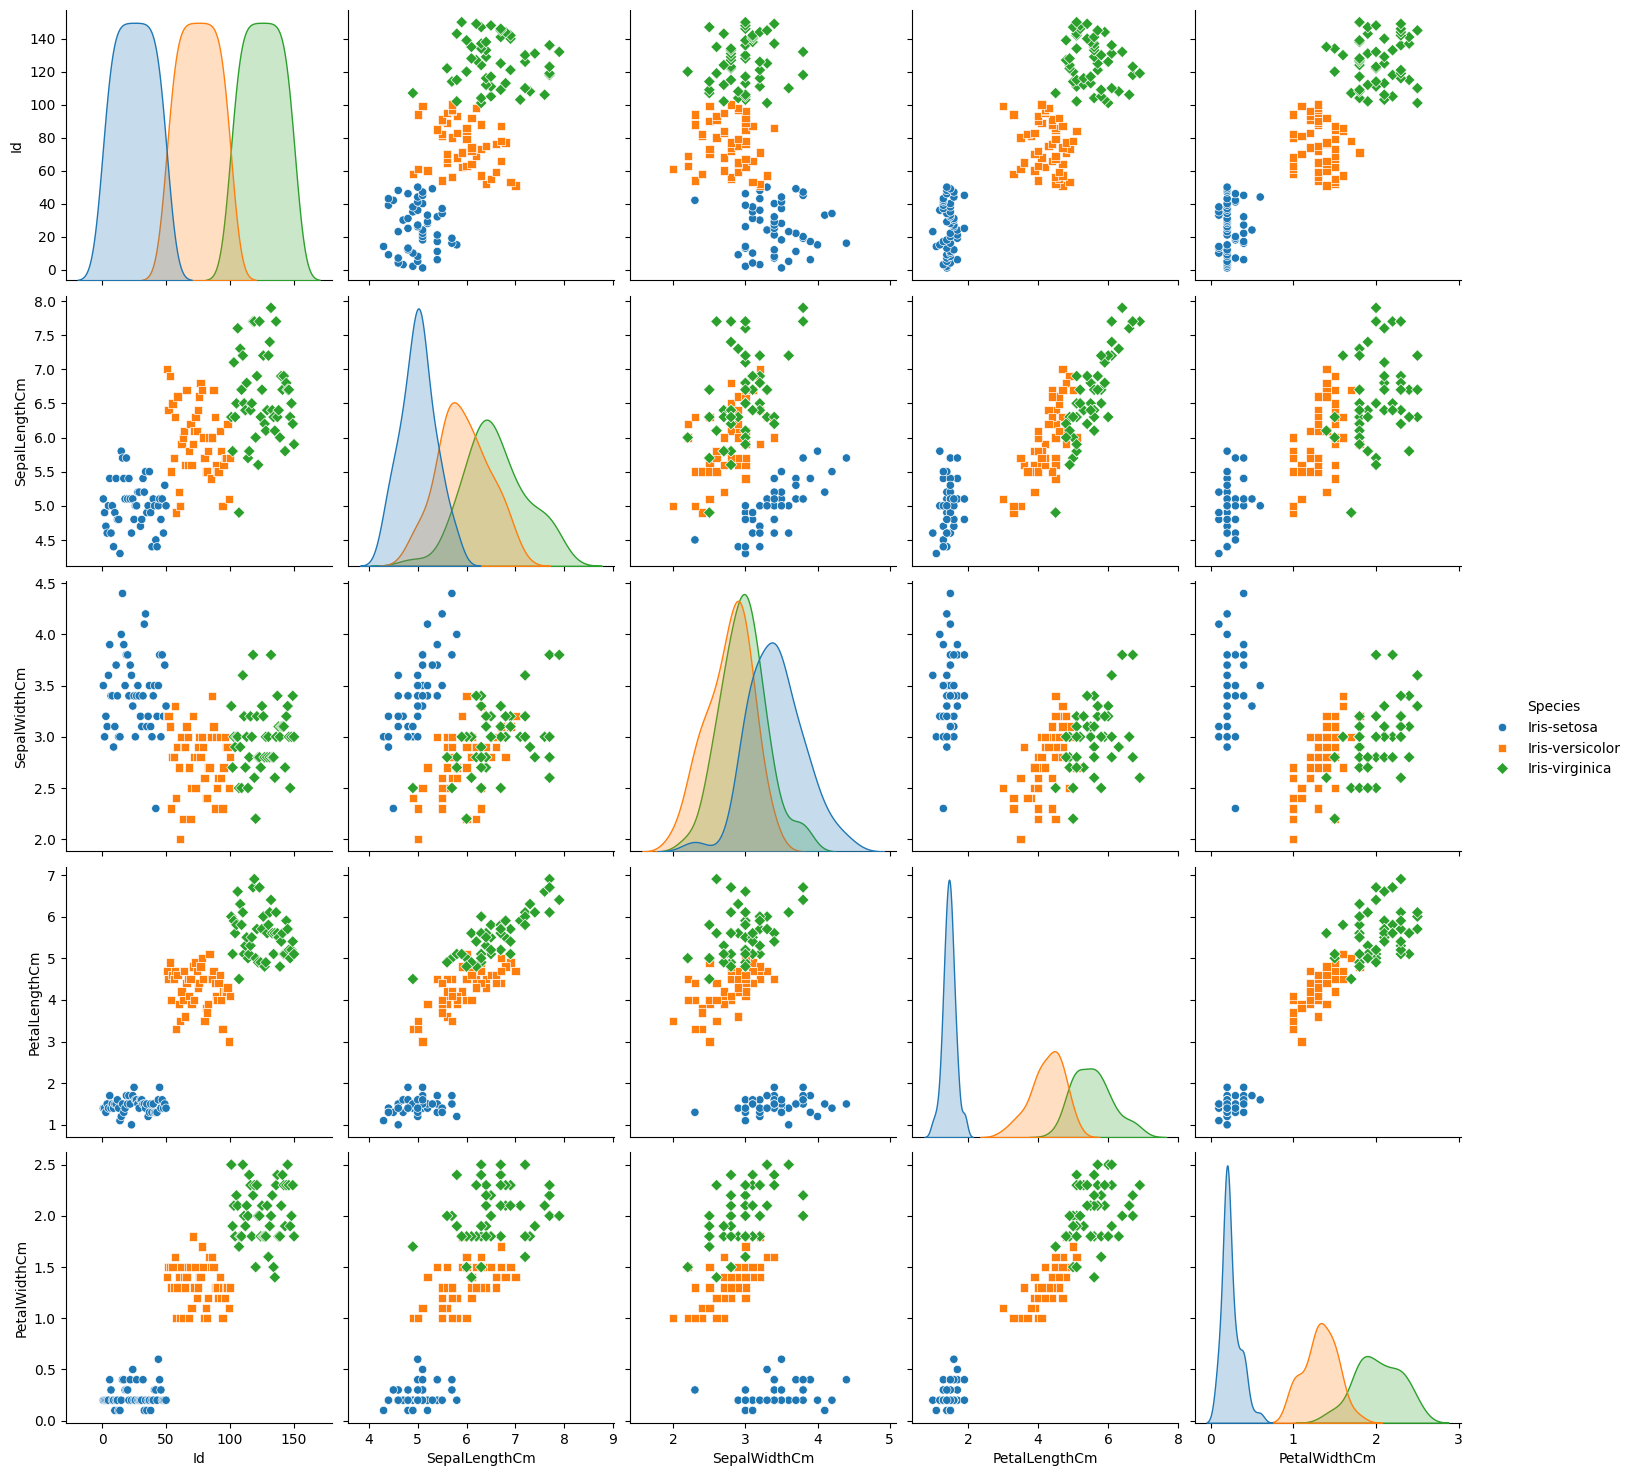

In [11]:
sns.pairplot(data_frame, hue="Species", size=3, markers=["o", "s", "D"])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [14]:
# dir(le)

le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
# Use mapping method to add the index to decode the output.

mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [16]:
y = le.transform(y)

In [17]:
# Standard Scaler - To make all attribute values in a similar range (Normalization)
# Removes the mean and scales each feature/variable to unit variance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Model Training  Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# Fitting the values in Logistic Regression model

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
model_prediction = model.predict(X_test_scaled)

In [22]:
accuracy_score(model_prediction, y_test)

1.0

In [23]:
# Fitting the models in K-Nearest Neighbors (KNN)

classi = KNeighborsClassifier(n_neighbors=3)
classi.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
classi_pred = classi.predict(X_test_scaled)

In [25]:
accuracy_score(y_test, classi_pred)

0.9666666666666667

In [26]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [27]:
svc_pred = svc.predict(X_test_scaled)

In [28]:
svc_pred = svc.predict(X_test_scaled)

In [29]:
accuracy_score(y_test, svc_pred)

1.0

In [30]:
# Fitting the models in Naive Bayes

from sklearn.naive_bayes import GaussianNB

naive_b = GaussianNB()
naive_b.fit(X_train_scaled, y_train)

GaussianNB()

In [31]:
naive_b_pred = naive_b.predict(X_test_scaled)

In [32]:
accuracy_score(y_test, naive_b_pred)

0.9666666666666667

In [33]:
# Confusion Matrix

confusion_matrix(y_test, model_prediction)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [34]:
confusion_matrix(y_test, classi_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [35]:
confusion_matrix(y_test, svc_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [36]:
confusion_matrix(y_test, naive_b_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [37]:
# All Model Scores

results = pd.DataFrame({
    'Model' : ['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes'],
    'Score' : [1.0, 1.0, 0.96, 0.96]
})

results_df = results.sort_values(by="Score", ascending=False)
results_df = results_df.set_index('Score')
results_df.head(9)

,Model
Score,
1.00,Logistic Regression
1.00,SVM
0.96,KNN
0.96,Naive Bayes


In [38]:
# Model Prediction

model_prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [39]:
classi_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [40]:
svc_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [41]:
naive_b_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [42]:
naive_b_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [43]:
#### To save the model in a pkl file

import pickle as pkl

pkl.dump(model, open('model.pkl', 'wb'))
pkl.dump(scaler, open('scaler.pkl', 'wb'))

In [44]:
# 2, 3, 4, 5

# load the scalar.pkl
with open('scaler.pkl', 'rb') as scaler_file:
    data = pkl.load(scaler_file)

In [45]:
type(data)

sklearn.preprocessing._data.StandardScaler

In [46]:
# Normalize using standard scalar
sample_input = np.array([2.0, 5.8, 2.8, 4.2]).reshape(-1,4)
processdata = data.transform(sample_input)

In [47]:
processdata

array([[-4.58247406,  6.38606206, -0.57151125,  3.83969158]])

In [48]:
# load the model.pkl

with open('model.pkl', 'rb') as model_file:
    model_data = pkl.load(model_file)

# Find ypred
model_predict = model_data.predict(processdata)

# Print the predicted class with decoded catergory label
model_predict

array(['Iris-setosa'], dtype=object)

In [49]:
# Below code is to get the library informations.
# Run all the code block inorder to get the Correct informations.

# !pip install session_info
# import session_info
# session_info.show()